In [ ]:
#### Dheeraj M

# Reference of implementation taken from: https://github.com/ngailapdi/LWF
import copy
from train import *


def distillation_loss(current_outputs, previous_outputs, alpha=0.5):
    mse_loss = nn.MSELoss()(current_outputs, previous_outputs.detach())
    return alpha * mse_loss



def train_and_evaluate_lwf(model, X_train, y_train, X_val, y_val, X_test, y_test, device, epochs=20, batch_size=32, alpha=0.5):
    train_loader = torch.utils.data.DataLoader(
        torch.utils.data.TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(
        torch.utils.data.TensorDataset(X_val, y_val), batch_size=batch_size, shuffle=False)
    test_loader = torch.utils.data.DataLoader(
        torch.utils.data.TensorDataset(X_test, y_test), batch_size=batch_size, shuffle=False)

    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)


    prev_model = copy.deepcopy(model)
    prev_model.eval()
    prev_model.to(device)

    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.train()
        total_loss = 0

        for x, y in train_loader:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            preds = model(x)

            # Standard loss
            loss = criterion(preds, y)

            # Distillation loss
            with torch.no_grad():
                prev_outputs = prev_model(x)
            dist_loss = distillation_loss(preds, prev_outputs, alpha)

            # Total loss
            total_loss_batch = loss + dist_loss

            total_loss_batch.backward()
            optimizer.step()
            total_loss += total_loss_batch.item()

        avg_train_loss = total_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation
        val_loss = 0
        model.eval()
        with torch.no_grad():
            for x, y in val_loader:
                x, y = x.to(device), y.to(device)
                preds = model(x)
                val_loss += criterion(preds, y).item()
        avg_val_loss = val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

        # Update prev_model to current model after each epoch
        prev_model = copy.deepcopy(model)
        prev_model.eval()
        prev_model.to(device)

    # Testing
    predictions, actuals = [], []
    with torch.no_grad():
        for x, y in test_loader:
            x, y = x.to(device), y.to(device)
            preds = model(x)
            predictions.append(preds.cpu().numpy())
            actuals.append(y.cpu().numpy())

    predictions = np.concatenate(predictions)
    actuals = np.concatenate(actuals)

    return predictions, actuals, train_losses, val_losses



[*********************100%***********************]  1 of 1 completed


Epoch [1/100], Train Loss: 0.0821, Val Loss: 0.0941
Epoch [2/100], Train Loss: 0.0093, Val Loss: 0.0112
Epoch [3/100], Train Loss: 0.0013, Val Loss: 0.0023
Epoch [4/100], Train Loss: 0.0005, Val Loss: 0.0004
Epoch [5/100], Train Loss: 0.0003, Val Loss: 0.0003
Epoch [6/100], Train Loss: 0.0004, Val Loss: 0.0007
Epoch [7/100], Train Loss: 0.0003, Val Loss: 0.0002
Epoch [8/100], Train Loss: 0.0003, Val Loss: 0.0003
Epoch [9/100], Train Loss: 0.0002, Val Loss: 0.0001
Epoch [10/100], Train Loss: 0.0003, Val Loss: 0.0001
Epoch [11/100], Train Loss: 0.0002, Val Loss: 0.0001
Epoch [12/100], Train Loss: 0.0002, Val Loss: 0.0001
Epoch [13/100], Train Loss: 0.0002, Val Loss: 0.0001
Epoch [14/100], Train Loss: 0.0002, Val Loss: 0.0001
Epoch [15/100], Train Loss: 0.0002, Val Loss: 0.0001
Epoch [16/100], Train Loss: 0.0002, Val Loss: 0.0002
Epoch [17/100], Train Loss: 0.0001, Val Loss: 0.0001
Epoch [18/100], Train Loss: 0.0001, Val Loss: 0.0001
Epoch [19/100], Train Loss: 0.0001, Val Loss: 0.0001
Ep

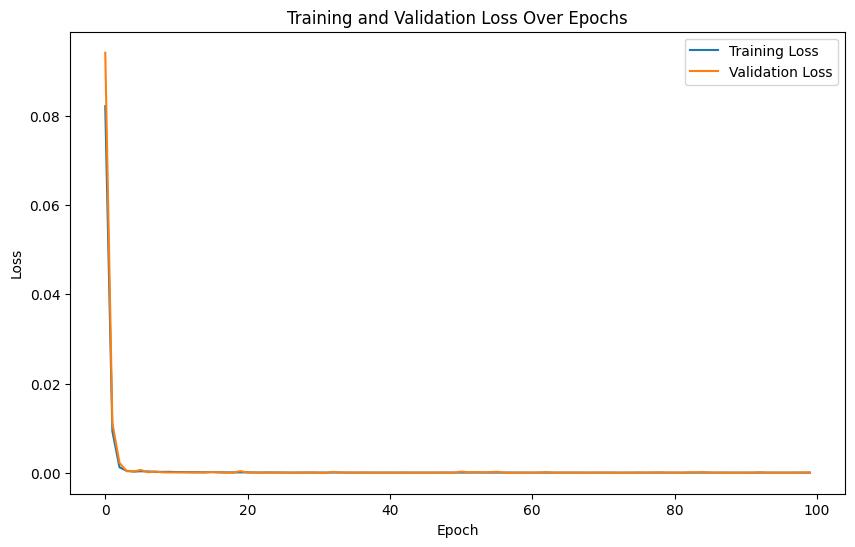

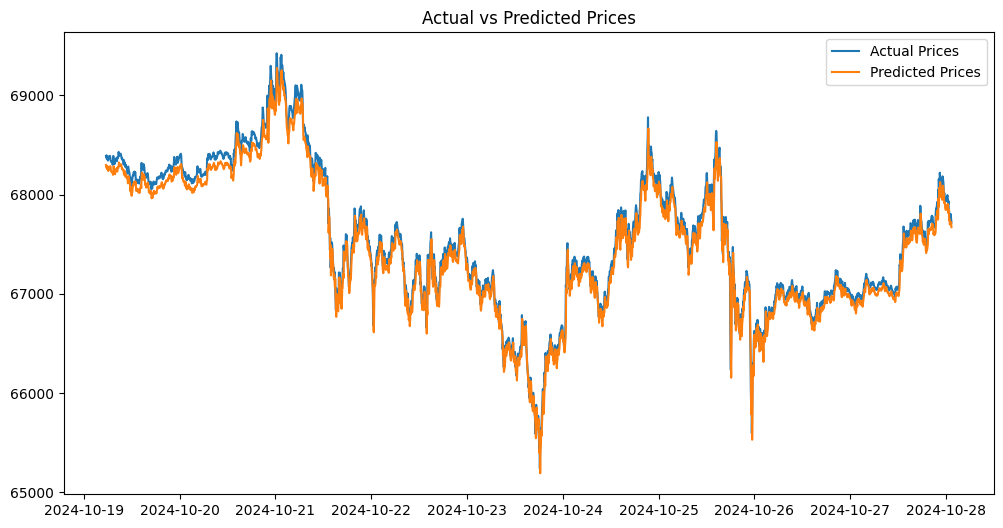

R² Score: 0.9786


[*********************100%***********************]  1 of 1 completed


Epoch [1/100], Train Loss: 0.0003, Val Loss: 0.0002
Epoch [2/100], Train Loss: 0.0002, Val Loss: 0.0002
Epoch [3/100], Train Loss: 0.0002, Val Loss: 0.0002
Epoch [4/100], Train Loss: 0.0002, Val Loss: 0.0002
Epoch [5/100], Train Loss: 0.0002, Val Loss: 0.0002
Epoch [6/100], Train Loss: 0.0002, Val Loss: 0.0002
Epoch [7/100], Train Loss: 0.0002, Val Loss: 0.0002
Epoch [8/100], Train Loss: 0.0002, Val Loss: 0.0002
Epoch [9/100], Train Loss: 0.0002, Val Loss: 0.0002
Epoch [10/100], Train Loss: 0.0002, Val Loss: 0.0002
Epoch [11/100], Train Loss: 0.0002, Val Loss: 0.0002
Epoch [12/100], Train Loss: 0.0002, Val Loss: 0.0002
Epoch [13/100], Train Loss: 0.0002, Val Loss: 0.0002
Epoch [14/100], Train Loss: 0.0002, Val Loss: 0.0002
Epoch [15/100], Train Loss: 0.0002, Val Loss: 0.0002
Epoch [16/100], Train Loss: 0.0002, Val Loss: 0.0002
Epoch [17/100], Train Loss: 0.0002, Val Loss: 0.0002
Epoch [18/100], Train Loss: 0.0002, Val Loss: 0.0002
Epoch [19/100], Train Loss: 0.0002, Val Loss: 0.0002
Ep

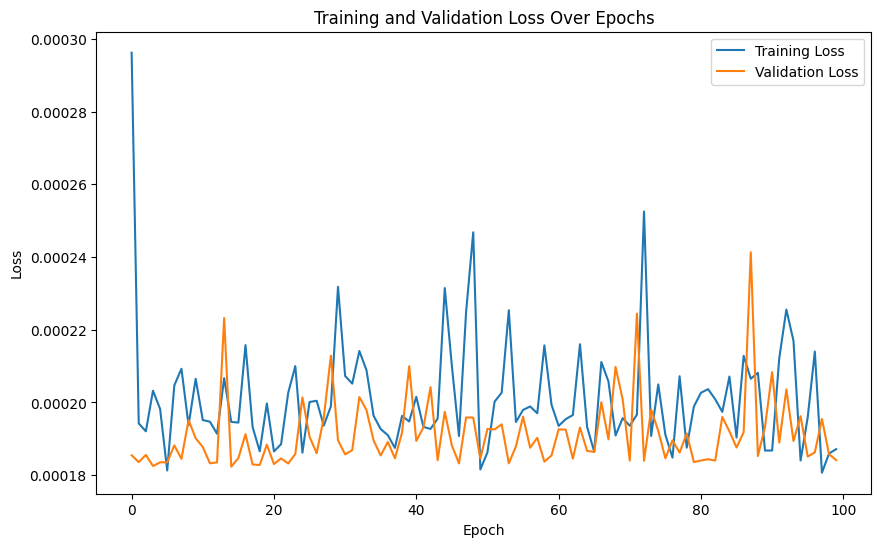

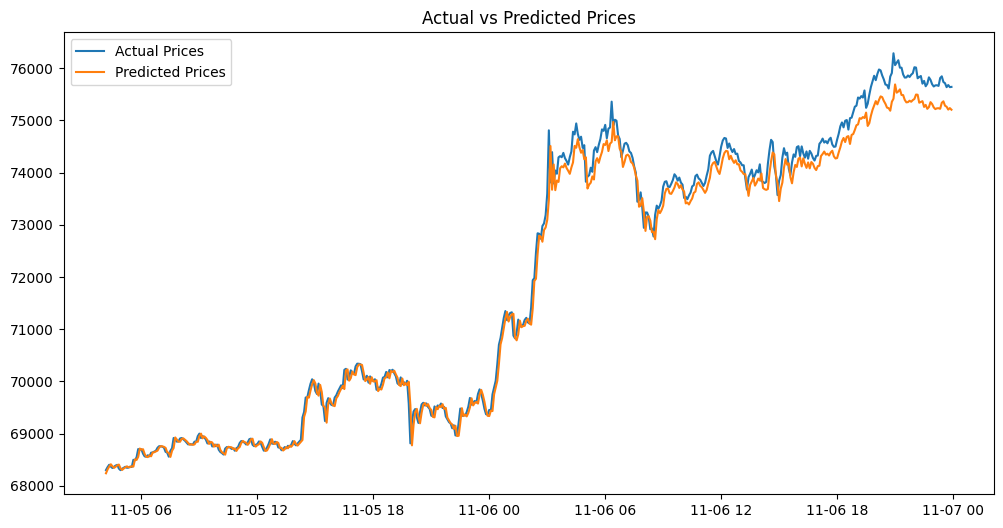

R² Score: 0.9909


[*********************100%***********************]  1 of 1 completed


Epoch [1/100], Train Loss: 0.0001, Val Loss: 0.0002
Epoch [2/100], Train Loss: 0.0001, Val Loss: 0.0003
Epoch [3/100], Train Loss: 0.0001, Val Loss: 0.0002
Epoch [4/100], Train Loss: 0.0001, Val Loss: 0.0002
Epoch [5/100], Train Loss: 0.0001, Val Loss: 0.0002
Epoch [6/100], Train Loss: 0.0001, Val Loss: 0.0003
Epoch [7/100], Train Loss: 0.0001, Val Loss: 0.0003
Epoch [8/100], Train Loss: 0.0001, Val Loss: 0.0003
Epoch [9/100], Train Loss: 0.0001, Val Loss: 0.0002
Epoch [10/100], Train Loss: 0.0001, Val Loss: 0.0002
Epoch [11/100], Train Loss: 0.0001, Val Loss: 0.0002
Epoch [12/100], Train Loss: 0.0001, Val Loss: 0.0002
Epoch [13/100], Train Loss: 0.0001, Val Loss: 0.0003
Epoch [14/100], Train Loss: 0.0001, Val Loss: 0.0003
Epoch [15/100], Train Loss: 0.0001, Val Loss: 0.0006
Epoch [16/100], Train Loss: 0.0001, Val Loss: 0.0007
Epoch [17/100], Train Loss: 0.0001, Val Loss: 0.0003
Epoch [18/100], Train Loss: 0.0001, Val Loss: 0.0003
Epoch [19/100], Train Loss: 0.0001, Val Loss: 0.0002
Ep

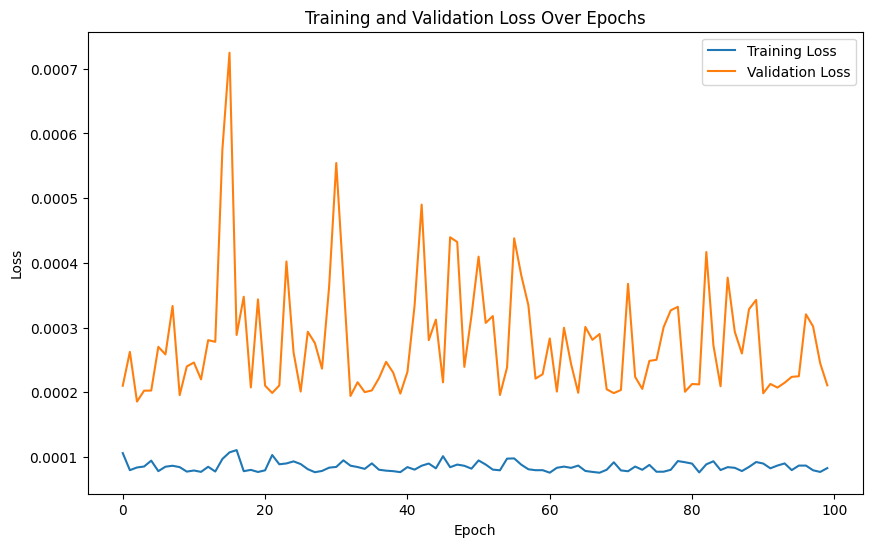

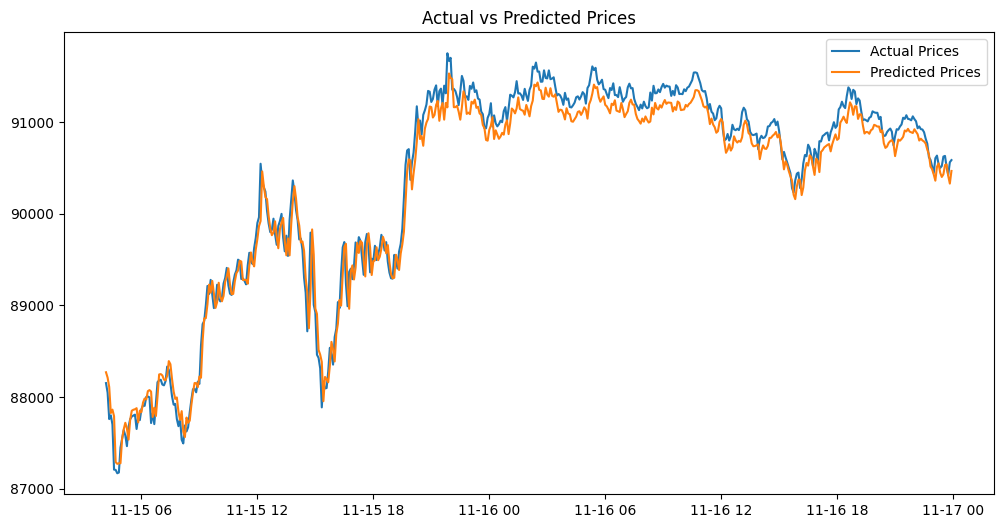

R² Score: 0.9770


[*********************100%***********************]  1 of 1 completed


Epoch [1/100], Train Loss: 0.0002, Val Loss: 0.0001
Epoch [2/100], Train Loss: 0.0002, Val Loss: 0.0001
Epoch [3/100], Train Loss: 0.0002, Val Loss: 0.0001
Epoch [4/100], Train Loss: 0.0002, Val Loss: 0.0001
Epoch [5/100], Train Loss: 0.0002, Val Loss: 0.0001
Epoch [6/100], Train Loss: 0.0002, Val Loss: 0.0001
Epoch [7/100], Train Loss: 0.0002, Val Loss: 0.0002
Epoch [8/100], Train Loss: 0.0002, Val Loss: 0.0001
Epoch [9/100], Train Loss: 0.0002, Val Loss: 0.0001
Epoch [10/100], Train Loss: 0.0002, Val Loss: 0.0002
Epoch [11/100], Train Loss: 0.0002, Val Loss: 0.0002
Epoch [12/100], Train Loss: 0.0002, Val Loss: 0.0002
Epoch [13/100], Train Loss: 0.0002, Val Loss: 0.0001
Epoch [14/100], Train Loss: 0.0002, Val Loss: 0.0001
Epoch [15/100], Train Loss: 0.0002, Val Loss: 0.0001
Epoch [16/100], Train Loss: 0.0002, Val Loss: 0.0001
Epoch [17/100], Train Loss: 0.0002, Val Loss: 0.0001
Epoch [18/100], Train Loss: 0.0002, Val Loss: 0.0001
Epoch [19/100], Train Loss: 0.0002, Val Loss: 0.0002
Ep

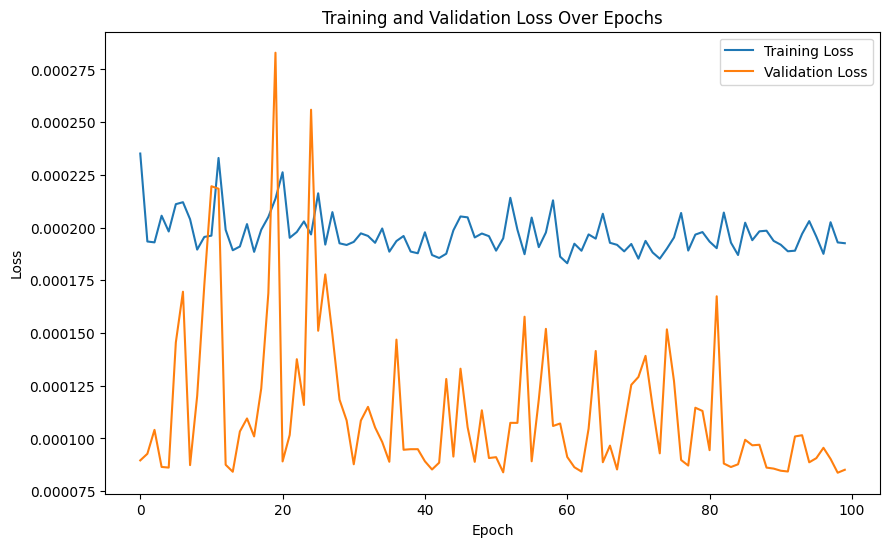

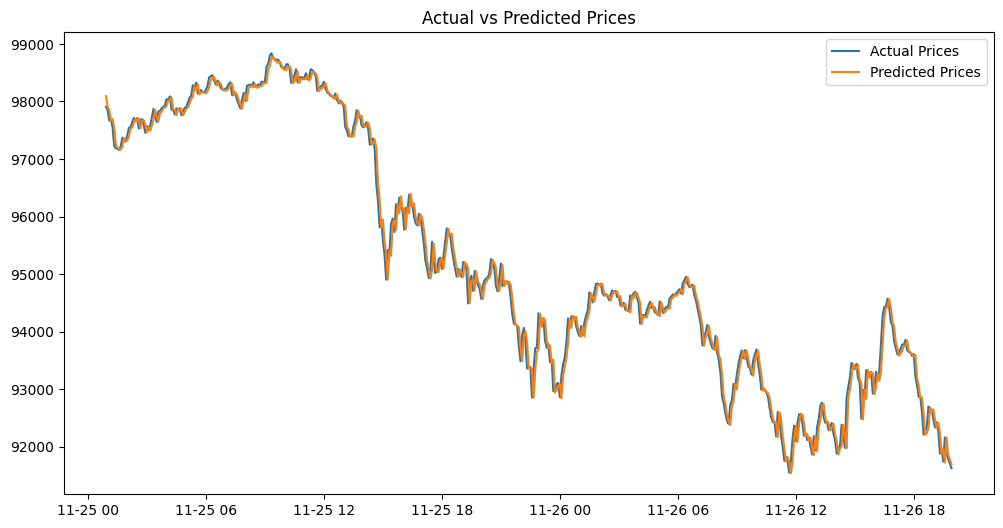

R² Score: 0.9923


In [ ]:

ticker = "BTC-USD"
sequence_length = 60
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

TODAY = datetime.datetime.now()

START = TODAY - datetime.timedelta(days=60)  # Last 60 days

# Initial task
start1, end1 = START, START +datetime.timedelta(days=30)
input_size, hidden_size, num_layers, output_size = 1, 64, 2, 1
model = LSTMModel(input_size, hidden_size, num_layers, output_size).to(device)


dataset_initial, scaler, test_dates = dataset_extraction(stock=ticker, start_time=start1, stop_time=end1, sequence_length=50,train_ratio=0.7,val_ratio = 0.1)
X_train = dataset_initial['train']
X_val = dataset_initial['val']
X_test = dataset_initial['test']

y_train = dataset_initial['train_label']
y_val = dataset_initial['val_label']
y_test = dataset_initial['test_label']

X_train, y_train = X_train.to(device), y_train.to(device)

# Train and evaluate using LwF
predictions, actuals, train_losses, val_losses = train_and_evaluate_lwf(
    model, X_train, y_train, X_val, y_val, X_test, y_test, device, epochs=100, batch_size=32, alpha=0.5)

# Inverse transform
predictions = scaler.inverse_transform(predictions)
actuals = scaler.inverse_transform(actuals)

# Plot results
plot_loss(train_losses, val_losses)
plot_results(actuals, predictions, test_dates)

r2 = calculate_r2(actuals, predictions)
print(f"R² Score: {r2:.4f}")

data_periods = []

data_periods.append((str_date(START +datetime.timedelta(days=30) ),str_date(START +datetime.timedelta(days=40) )))
data_periods.append((str_date(START +datetime.timedelta(days=40) ),str_date(START +datetime.timedelta(days=50) )))
data_periods.append((str_date(START +datetime.timedelta(days=50) ),str_date(START +datetime.timedelta(days=60) )))
# Incremental tasks
for (start, end) in data_periods:    # Prepare data
    dataset_initial, scaler, test_dates = dataset_extraction(stock=ticker, start_time=start, stop_time=end, sequence_length=50,)
    X_train = dataset_initial['train']
    X_val = dataset_initial['val']
    X_test = dataset_initial['test']

    y_train = dataset_initial['train_label']
    y_val = dataset_initial['val_label']
    y_test = dataset_initial['test_label']

    X_train, y_train = X_train.to(device), y_train.to(device)

    # Train and evaluate using LwF
    predictions, actuals, train_losses, val_losses = train_and_evaluate_lwf(
        model, X_train, y_train, X_val, y_val, X_test, y_test, device, epochs=100, batch_size=32, alpha=0.5)

    # Inverse transform
    predictions = scaler.inverse_transform(predictions)
    actuals = scaler.inverse_transform(actuals)

    # Plot results
    plot_loss(train_losses, val_losses)
    plot_results(actuals, predictions, test_dates)

    r2 = calculate_r2(actuals, predictions)
    print(f"R² Score: {r2:.4f}")
